# Iris Data Analysis

This data was downloaded from: http://archive.ics.uci.edu/ml/datasets/Iris/

## Imports

In [7]:
from __future__ import print_function
import os
data_path = ['data']

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## Loading Data

In [4]:
#The filepath is dependent on the data_path set in the previous cell 
filepath = os.sep.join(data_path + ['iris.csv'])
data = pd.read_csv(filepath, sep=',', header=0)

## Analysing Data

In [5]:
data.shape

(150, 5)

In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [11]:
data.dtypes.value_counts()

float64    4
object     1
dtype: int64

### Composition of the dataset
The Dataset contains 50 rows each of the three types of flowers

In [12]:
data.groupby('species').size()

species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

## Visualizing the Data
Here the data will be visualized in the form of plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCBE7A0048>,
      dtype=object)

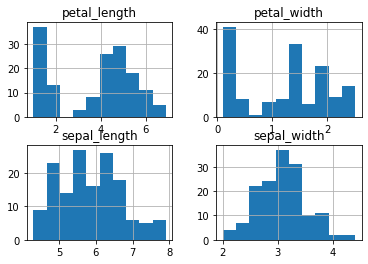

In [13]:
data.hist()

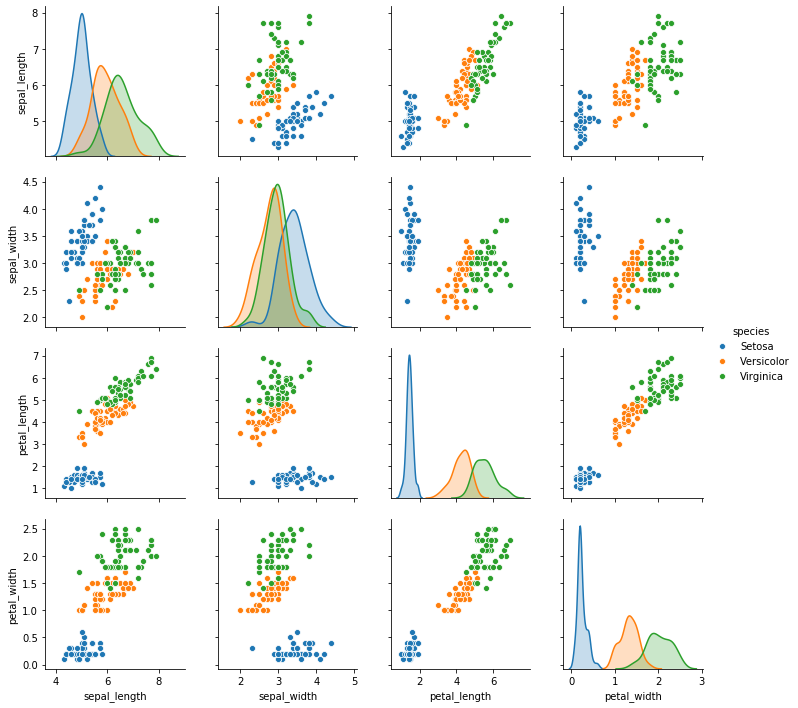

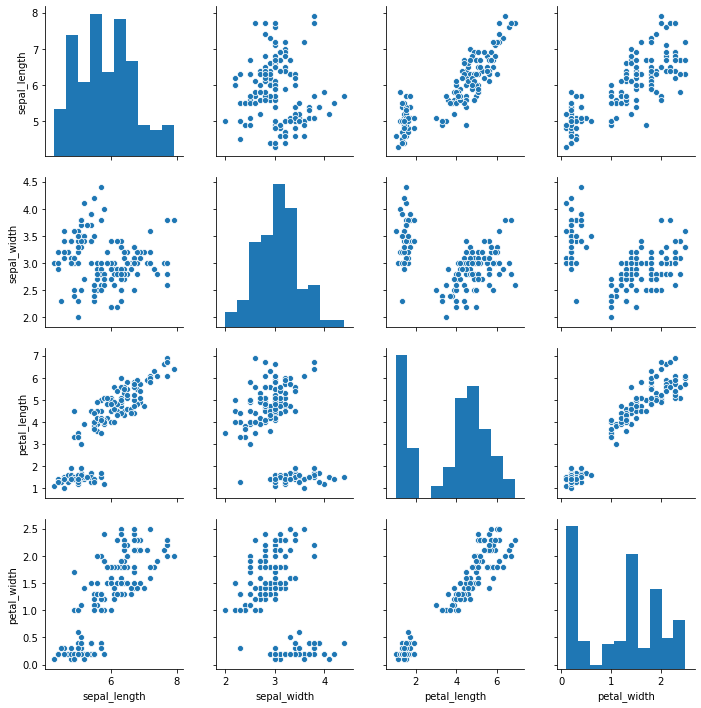

In [19]:
sns.pairplot(data, hue='variety')
sns.pairplot(data)

## Preparing Data

In [20]:
features=data.iloc[:, 0:3]
target=data["species"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=103)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 3), (45, 3), (105,), (45,))

## Training

Running three models Decision Trees, KNN and SVMs and comparing them.

In [49]:
accuracies = []
cvs = []

In [50]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)

In [51]:
cvs.append(cross_val_score(dt, X_train, y_train, cv=3))
cvs.append(cross_val_score(knn, X_train, y_train, cv=3))
cvs.append(cross_val_score(svm, X_train, y_train, cv=3))

## Testing

Testing the three models and showing their classification report and confusion matrices.

In [52]:
y_pred = dt.predict(X_test)
accuracies.append(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 13  0]
 [ 0  3 15]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.81      1.00      0.90        13
   Virginica       1.00      0.83      0.91        18

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [53]:
y_pred = knn.predict(X_test)
accuracies.append(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 13  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.93      1.00      0.96        13
   Virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [54]:
y_pred = svm.predict(X_test)
accuracies.append(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0 13  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.93      1.00      0.96        13
   Virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Visualizing Results

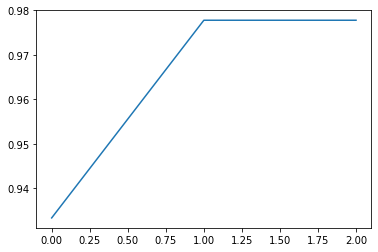

In [55]:
plt.plot(accuracies)

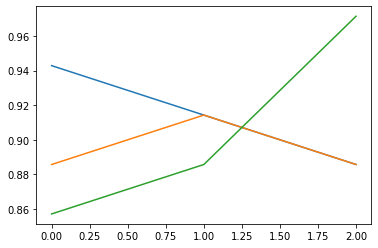

In [56]:
plt.plot(cvs)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fcc9081e08>,
 'caps': [<matplotlib.lines.Line2D at 0x1fcc9081f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fcc9081708>,
 'medians': [<matplotlib.lines.Line2D at 0x1fcc9084f88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fcc908b988>,
 'means': []}

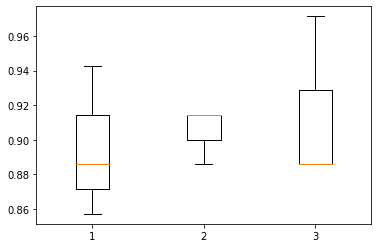

In [57]:
plt.boxplot(cvs)